<center> <h1> <b> Speech Systems (EE6307) </b> </h1> </center>

<b> Programming Assignment - 05 - Statistical and Deep Learning approaches to Automatic Speaker Verification </b>

Welcome to the fifth programming assignment in the speech systems (EE6307) course. The current programming assignment expects you to automate the speaker verification system (ASV). Automatic speaker verification is the task of verifying the claimed identity of a speaker based on their voice characteristics. In simpler words, Given two utterances, The ASV system should output a binary value saying whether they came from the same speaker or not. The current programming assignment is broadly classified into two parts. In the first part of the programming assignment, you need to code an algorithm to automate the speaker verification system using GMM-UBM models. The second part of the programming assignment requires you to design discriminative methods ( X-vector ) for the ASV system. Compare the generative ( GMM-UBM) with discriminative ( X-vector ) models for ASV, and write down your observations. 





<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.





<h4> <b> Statistical approaches to speaker verification (GMM-UBM models) : </b>  This section describes the steps required to build an ASV system using GMM-UBM models. As the primary goal of the programming assignment is to build an ASV system and understand its pros and cons, We request you use either your previous assignment codes or built-in codes from python packages to extract the features. You can also use the scikit-learn package to estimate the parameters of GMM models. Please download the data from the below link and go through the Readme file for finer details i.e, data for training the UBM model, data for evaluating the ASV system  </h4> 

[link to data](https://drive.google.com/drive/folders/1Btnpm_QwSirInGKvL0yq5UL_zL23rM1f?usp=sharing)

<dt> <h4> 1. Feature Extraction </h4> </dt> 
<dd> <h4> - Extract 30-dimensional Mel Frequency Cepstral Coefficients (MFCCs) from the speech signal. Add delta (velocity) and delta-delta (acceleration) coefficients to include the formant dynamics in the features. Use the following parameters for extracting the features. Framesize = 25 msec, Frameshift = 10 msec and number of mel filter banks = 40  </h4> </dd> 
<dt> <h4> 2. Feature preprocessing </h4> </dt> 
<dd> <h4> - Process the features using cepstral mean-variance normalization (CMVN) to remove the convolutive noise. Use the optimal window in CMVN preprocessing. Typically it is preferred to use 3 seconds.   </h4> </dd> 
<dd> <h4> - Voice Activity Detector (VAD): Silence regions in the speech signal will not contain speaker information, and including them in GMM modeling will deteriorate the performance. Hence, remove the silence/noise frames using an energy-based voice activity detector module  </h4> </dd> 
<dt> <h4> 2. Universal Background Modeling (UBM) </h4> </dt> 
<dd> <h4> - Let us consider a Gaussian Mixture Model (GMM) with 128 Gaussians.  </h4> </dd> 
<dd> <h4> - Estimate the parameters of the GMM model from large number of background speakers. Make sure that the background speakers are not involved in testing.   </h4> </dd> 
<dd> <h4> - Speech data from 100 speakers are provided to estimate the UBM parameters. If you do not have sufficient computational resources, please use less number of speakers to estimate the parameters.   </h4> </dd>
<dt> <h4> 2. Speaker-specific GMM's </h4> </dt> 
<dd> <h4> - Inputs : Trained UBM model i.e $\lambda^{ubm}$ and speaker training data i.e X   </h4> </dd> 
<dd> <h4> - Stats estimation from UBM model: Compute the responsibility of the Gaussians with the initial estimates as UBM parameters </h4> </dd> 
<dd> <h4> <center> $\gamma_{nk}$ = $\frac{\pi_{k}^{ubm} N ( x_{n} / \mu_{k}^{ubm} , \sigma_{k}^{2} )}{ \sum_{m=1}^{M} \pi_{m}^{ubm} N ( x_{n} / \mu_{m}^{ubm} , \sigma_{m}^{2} ) }$ </center> </h4> </dd> 
<dd> <h4> where $\gamma_{nk}$ represents the responsibility of $k^{th}$ gaussian in generating $n^{th}$ data point and {$ \pi_{m}^{ubm} , \mu_{m}^{ubm} , \sigma_{m}^{2} $} are the UBM parameters    </h4> </dd> 

<dd> <h4> - EM update for $\mu_{k}$ and  $\pi_{k}$: Estimate the parameters of the GMM { $\mu_{k}$,$\pi_{k}$ } using the available speaker's data  </h4> </dd> 
<dd> <h4> <center> $\mu_{k}^{em}$ = $\frac{1}{N_{k}}$ $\sum_{n=1}^{N}$ $\gamma_{nk}x_{n}$ </center> 
<center> $\pi_{k}^{em}$ = $\frac{\sum\limits_{n=1}^{N} \gamma_{nk}}{N} $ </center>  </h4> </dd> 

<dd> <h4> - MAP update : Considering the UBM model as the prior information, The MAP adaption results in the following updates to zeroth order{$\pi_{k}$} and first-order statistics ($\mu_{k}$)   </h4> </dd> 
<dd> <h4> <center> $\mu_{k}^{spk}$ = $\alpha\mu_{k}^{ubm}$ + $(1-\alpha)\mu_{k}^{em}$ </center> <br>
<center> $\pi_{k}^{spk}$ = $\alpha\pi_{k}^{ubm}$ + $(1-\alpha)\pi_{k}^{em}$ </center>   </h4> </dd> 
<dd> <h4>  Where $\alpha$ is given by $\frac{N_{k}}{N_{k} + r}$ and "r" is the relevance factor.  </h4> </dd> 

<dt> <h4> 3. Compute the likelihood ratio </h4> </dt> 
<dd> <h4> - Estimate the score for the hypothesis that the given speaker came from the hypothesized speaker  </h4> </dd>
<dd> <h4> - Let X be the set of feature vectors from the test utterance  </h4> </dd>
<dd> <h4> - Let k be the claimed identity of the speaker. 
<dd> <h4> - H0 = Feature set X is from speaker k  </h4> </dd>
<dd> <h4> - H1 = Feature set X is not from speaker k   </h4> </dd>
<dd> <h4> - Hypothesis testing based on likelihood ratio   </h4> </dd>

<dd> <h4>
</br>
<center>  $\frac{P(X/\lambda_{k})}{P(X/\lambda_{\bar{k}})}$ >= $\theta$ accepts H0 </center> </br>
<center>  $\frac{P(X/\lambda_{k})}{P(X/\lambda_{\bar{k}})}$ < $\theta$ reject H0 </center>  <br>
</h4> </dd> 

<dd> <h4> $\lambda_{k}$ denotes model estimated from reference utterance of k. </h4> </dd>
<dd> <h4> $\lambda_{\bar{k}}$ denotes model estimated from entire world except k. Let us consider UBM model here. </h4> </dd> </h4> </dd>

<dt> <h4> 4. Performance Evaluation :  </h4> </dt> 

<dd> <h4> - Speech data from 40 speakers are provided to evaluate the ASV performance </h4> </dd>
<dd> <h4> - Compute Equal Error Rate (EER) to evaluate the developed ASV system.  </h4> </dd>
<dd> <h4> - Please do evaluate the EER on the set of verification trials ( 1000 trials ) and report it  </h4> </dd>

<dt> <h4> 5. Optinal :  </h4> </dt> 

<dd> <h4> - Experiment with varying amount of speech data in UBM modeling </h4> </dd>
<dd> <h4> - Does it depends on the number of speakers in the UBM data or the amount of speech in it ? </h4> </dd>
<dd> <h4> - Report your observations </h4> </dd>




In [3]:
from google.colab import drive
import zipfile

drive.mount('/content/drive')

zip_path='/content/drive/My Drive/speechAudio/ASV_Data.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
# zip_ref.extractall("/content/drive/My Drive/speechAudio/")
zip_ref.extractall("/content/")
zip_ref.close()

Mounted at /content/drive


In [6]:
#################################
#Import all the modules
#################################

import numpy as np
import librosa
from sklearn.mixture import GaussianMixture
import pickle
import os
import matplotlib.pyplot as plt 
import pandas as pd
import random as rand
from scipy.stats import norm, multivariate_normal
import sys
import math

!pip install speechpy
import speechpy
from tqdm import tqdm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#################################
#Dataset Manifests using Pandas
#################################

data_path='/content/ASV_Data/UBM_data'

dataframe = []

for subdir, dirs, files in os.walk(data_path):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".wav"):

            data = {
                'filepath'  : filepath,
                'speaker'   : os.path.basename(os.path.dirname(subdir))
            }

            dataframe.append(data)

dfs = pd.DataFrame(dataframe)
dfs.head()

,filepath,speaker
0,/content/ASV_Data/UBM_data/id10855/_MCGF6XIzfI...,id10855
1,/content/ASV_Data/UBM_data/id10855/_MCGF6XIzfI...,id10855
2,/content/ASV_Data/UBM_data/id10855/_MCGF6XIzfI...,id10855
3,/content/ASV_Data/UBM_data/id10855/_MCGF6XIzfI...,id10855
4,/content/ASV_Data/UBM_data/id10855/_MCGF6XIzfI...,id10855


In [5]:
# Selecting 20 Unique Speakers for UBM for less computation
UBM_Speakers = dfs.speaker.unique()[:20]

In [6]:
#################################
# Feature Extraction for UBM Model
#################################

speaker_dfs = {}
for speaker in UBM_Speakers:
  speaker_dfs[speaker] = dfs.loc[dfs['speaker'] == speaker]

speaker_feats = {}
count = 0
for speaker in UBM_Speakers:
  print("Extracting Features for Speaker " + str(count+1) + "/20")
  df = speaker_dfs[speaker]
  stack = []
  for ind in tqdm(df.index):
    y, sr = librosa.load(df["filepath"][ind], sr = None)
    y = y/max(abs(y))
    hop_length = int(sr*0.010)
    frameSize = int(sr*0.025)
    energies = librosa.feature.rms(y=y, frame_length = frameSize, hop_length = hop_length)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=20, win_length=frameSize)
    indexes = energies[0] > 0.1
    if len(indexes) == mfcc.shape[1]:
      mfcc_delta = librosa.feature.delta(mfcc)
      mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
      feature = np.vstack([mfcc, mfcc_delta, mfcc_delta2])
      feature = speechpy.processing.cmvnw(feature, win_size=301, variance_normalization=True)
      stack.append(feature[:,indexes])
  speaker_feats[speaker] = stack
  count += 1

Extracting Features for Speaker 1/20


100%|██████████| 124/124 [00:18<00:00,  6.88it/s]


Extracting Features for Speaker 2/20


100%|██████████| 82/82 [00:12<00:00,  6.69it/s]


Extracting Features for Speaker 3/20


100%|██████████| 52/52 [00:10<00:00,  4.85it/s]


Extracting Features for Speaker 4/20


100%|██████████| 70/70 [00:09<00:00,  7.26it/s]


Extracting Features for Speaker 5/20


100%|██████████| 141/141 [00:18<00:00,  7.83it/s]


Extracting Features for Speaker 6/20


100%|██████████| 160/160 [00:28<00:00,  5.67it/s]


Extracting Features for Speaker 7/20


100%|██████████| 64/64 [00:08<00:00,  7.79it/s]


Extracting Features for Speaker 8/20


100%|██████████| 185/185 [00:19<00:00,  9.72it/s]


Extracting Features for Speaker 9/20


100%|██████████| 65/65 [00:08<00:00,  7.29it/s]


Extracting Features for Speaker 10/20


100%|██████████| 112/112 [00:13<00:00,  8.10it/s]


Extracting Features for Speaker 11/20


100%|██████████| 59/59 [00:09<00:00,  6.42it/s]


Extracting Features for Speaker 12/20


100%|██████████| 53/53 [00:06<00:00,  8.56it/s]


Extracting Features for Speaker 13/20


100%|██████████| 220/220 [00:24<00:00,  8.97it/s]


Extracting Features for Speaker 14/20


100%|██████████| 54/54 [00:06<00:00,  7.95it/s]


Extracting Features for Speaker 15/20


100%|██████████| 197/197 [00:25<00:00,  7.72it/s]


Extracting Features for Speaker 16/20


100%|██████████| 55/55 [00:06<00:00,  8.30it/s]


Extracting Features for Speaker 17/20


100%|██████████| 82/82 [00:12<00:00,  6.76it/s]


Extracting Features for Speaker 18/20


100%|██████████| 80/80 [00:10<00:00,  7.91it/s]


Extracting Features for Speaker 19/20


100%|██████████| 113/113 [00:14<00:00,  7.96it/s]


Extracting Features for Speaker 20/20


100%|██████████| 198/198 [00:27<00:00,  7.29it/s]


In [7]:
#################################
#Building UBM Model
#################################

# stacking all features for single speaker =========> (60, T*Wavefiles)
speaker_wise_stacked = {}

for speaker in speaker_feats.keys():
  speaker_wise_stacked[speaker] = np.concatenate(speaker_feats[speaker], axis=1)

# stacking all features for all speakers =========> (60, T*Wavefiles*speakers)
X = np.concatenate(list(speaker_wise_stacked.values()), axis=1)
print(X.shape)

(60, 728784)


In [8]:
# UBM Model Training

ubm_gm = GaussianMixture(n_components=128, random_state=0, covariance_type="diag").fit(X.T)

In [9]:
ubm_gm.covariances_.shape

(128, 60)

In [22]:
#################################
#Building Speaker Models
#################################

data_path='/content/ASV_Data/evaluation_data'

dataframe = []

for subdir, dirs, files in os.walk(data_path):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        y, sr = librosa.load(filepath, sr = None)

        if filepath.endswith(".wav"):

            data = {
                'filepath'  : filepath,
                'speaker'   : os.path.basename(os.path.dirname(subdir))
            }

            dataframe.append(data)

dfs = pd.DataFrame(dataframe)

# Selecting 5 Unique Speakers for less computation
speakers = dfs.speaker.unique()[:5]

print("Selected Speakers : ", speakers)

speaker_dfs = {}
for speaker in speakers:
  speaker_dfs[speaker] = dfs.loc[dfs['speaker'] == speaker]

print("Created Manifests and Selected 5 Unique Speakers")

# Extracting features
speaker_feats = {}
count = 0
for speaker in speakers:
  print("Extracting Features for Speaker " + str(count+1) + "/5")
  df = speaker_dfs[speaker].head(1)
  stack = []
  for ind in tqdm(df.index):
    y, sr = librosa.load(df["filepath"][ind], sr = None)
    y = y/max(abs(y))
    hop_length = int(sr*0.010)
    frameSize = int(sr*0.025)
    energies = librosa.feature.rms(y=y, frame_length = frameSize, hop_length = hop_length)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=20, win_length=frameSize)
    indexes = energies[0] > 0.1
    if len(indexes) == mfcc.shape[1]:
      mfcc_delta = librosa.feature.delta(mfcc)
      mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
      feature = np.vstack([mfcc, mfcc_delta, mfcc_delta2])
      feature = speechpy.processing.cmvnw(feature, win_size=301, variance_normalization=True)
      stack.append(feature[:,indexes])
  speaker_feats[speaker] = stack
  count += 1

speaker_wise_stacked = {}

for speaker in speaker_feats.keys():
  speaker_wise_stacked[speaker] = np.concatenate(speaker_feats[speaker], axis=1).T

print("Created Stacked features for all selected speakers")

Selected Speakers :  ['id10287' 'id10303' 'id10286' 'id10307' 'id10296']
Created Manifests and Selected 5 Unique Speakers
Extracting Features for Speaker 1/5


100%|██████████| 1/1 [00:00<00:00, 13.53it/s]


Extracting Features for Speaker 2/5


100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Extracting Features for Speaker 3/5


100%|██████████| 1/1 [00:00<00:00,  9.38it/s]


Extracting Features for Speaker 4/5


100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Extracting Features for Speaker 5/5


100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

Created Stacked features for all selected speakers


In [27]:
# Generating GMM Models for each speaker

epsilon = 1e-6*np.identity(60)

def initialization(X, ubm_gm, M = 128):
  mus = ubm_gm.means_
  covs = np.zeros((M,len(X[0]),len(X[0])))
  for g in range(len(covs)):
    covs[g] = np.diag(ubm_gm.covariances_[g])
  pi = ubm_gm.weights_
  theta = {"mus" : mus, "covs" : covs, "pi" : pi}
  return theta

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################

def logLikelihood(X, theta, M = 128):
  pi =  theta["pi"]
  mus =  theta["mus"]
  covs =  theta["covs"]
  J = np.log(np.sum([k*multivariate_normal(mus[i],covs[j]).pdf(X) for k,i,j in zip(pi,range(len(mus)),range(len(covs)))]))
  return J

def likelihood(X, theta, M = 128):
  pi =  theta["pi"]
  mus =  theta["mus"]
  covs =  theta["covs"]
  J = np.sum([k*multivariate_normal(mus[i],covs[j]).pdf(X) for k,i,j in zip(pi,range(len(mus)),range(len(covs)))])
  return J

############################################################################
#Write a function for the expectation step 
############################################################################

def expectation(X, theta):
  pi =  theta["pi"]
  mus =  theta["mus"]
  covs =  theta["covs"]
  responsibilty = np.zeros((len(X),len(covs)))

  for m,co,p,r in zip(mus, covs, pi,range(len(responsibilty[0]))):
    co+=1e-6*np.identity(len(X[0]))
    mn = multivariate_normal(mean=m,cov=co)
    responsibilty[:,r] = p*mn.pdf(X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(pi,mus,covs+epsilon)],axis=0)

  return responsibilty

############################################################################
#Write a function for the maximization step. 
############################################################################

def maximization(X, theta, theta_ubm, relevance, responsibility):
  mus = []
  covs = theta["covs"]
  pi = []
  mu_ubm = theta_ubm["mus"]
  pi_ubm = theta_ubm["pi"]

  for c in range(len(responsibility[0])):
    Nk = np.sum(responsibility[:,c],axis=0)
    mu_em = (1/Nk)*np.sum(X*responsibility[:,c].reshape(len(X),1),axis=0)
    pi_em = Nk/np.sum(responsibility)

    # MAP Adaption Weighting
    alpha = Nk/(Nk + relevance)
    mu_spk = alpha*mu_em + (1-alpha)*mu_ubm[c]
    pi_spk = alpha*pi_em + (1-alpha)*pi_ubm[c]

    mus.append(mu_spk)
    pi.append(pi_spk)

  theta = {"mus" : np.array(mus), "covs" : covs, "pi" : np.array(pi)}
  return theta

############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################

def EMalgo(X, theta, theta_ubm, relevance, iters = 30):
  logLikelihoods = np.zeros(iters)
  thetas = []
  for i in range(iters):
    res = expectation(X, theta)
    theta = maximization(X, theta, theta_ubm, relevance, res)
    thetas.append(theta)
    logLikelihoods[i] = logLikelihood(X, theta)
  return thetas, logLikelihoods

In [35]:
# GMM Training

models = {}

for speaker in speaker_feats.keys():
  print("Training for Speaker " + str(speaker))
  X = speaker_wise_stacked[speaker]
  theta = initialization(X, ubm_gm, 128)
  theta_ubm = theta
  thetas, logLikelihoods = EMalgo(X, theta, theta_ubm, relevance=0.9, iters=2)
  gmm = {
      "theta" : thetas,
      "loglikes" : logLikelihoods
  }
  models[speaker] = gmm

Training for Speaker id10287
Training for Speaker id10303
Training for Speaker id10286
Training for Speaker id10307
Training for Speaker id10296


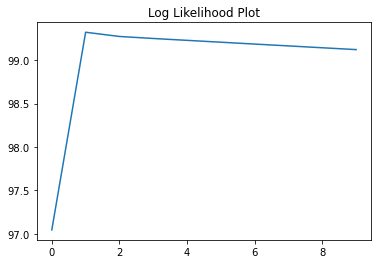

In [34]:
# Log Liklihood for single speaker with 10 EM Iterations
plt.plot(models["id10287"]["loglikes"])
plt.title("Log Likelihood Plot")
plt.show()

In [37]:
############################################################################
# Computing the likelihood ratio
############################################################################

# Loading verification frames
data_path = "/content/ASV_Data/Verification_trials"
verify_df = pd.read_csv(data_path, sep=" ", header=None, names=["label", "wav1", "wav2"])

for ind in verify_df.index:
  verify_df["wav1"][ind] = "/content/ASV_Data/evaluation_data/" + str(verify_df["wav1"][ind])
  verify_df["wav2"][ind] = "/content/ASV_Data/evaluation_data/" + str(verify_df["wav2"][ind])

verify_df.head()

,label,wav1,wav2
0,1,id10293/k1jiAINXHRI/00024.wav,id10293/Mp1IXRquJ9s/00005.wav
1,1,id10296/ZEpT2orkZTc/00002.wav,id10296/DKDZ6ENKX0o/00002.wav
2,0,id10283/vaK4t1-WD4M/00005.wav,id10304/GRv7pEnTwUc/00001.wav
3,1,id10290/O-V_sInAw5M/00006.wav,id10290/T1y64qFjv3M/00003.wav
4,1,id10293/TnOGBL8p-RM/00005.wav,id10293/TwfthltapLg/00004.wav


In [ ]:
for sample in verify_df.keys():
  likes = []
  y, sr = librosa.load(df["filepath"][ind], sr = None)
  y = y/max(abs(y))
  hop_length = int(sr*0.010)
  frameSize = int(sr*0.025)
  energies = librosa.feature.rms(y=y, frame_length = frameSize, hop_length = hop_length)
  mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=20, win_length=frameSize)
  indexes = energies[0] > 0.1
  if len(indexes) == mfcc.shape[1]:
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    feature = np.vstack([mfcc, mfcc_delta, mfcc_delta2])
    feature = speechpy.processing.cmvnw(feature, win_size=301, variance_normalization=True)
    X = feature[:,indexes].T
  else:
    break
  for speaker in models.keys():
    theta = models[speaker]["theta"]
    likes.append(likelihood(X, theta))
  likes = np.array(likes)
  # pick the best model:
  modelindex = np.where(likes == likes.min())
  model = list(models.values())[modelindex]

  # creating hypothesis ratio
  

<h4> <b> Descriminative approaches to speaker verification (x-vector model) : </b>  This section describes the steps required to extract speaker embedding using the DNN framework. Please use the PyTorch toolkit for this assignment.

<dt> <h4> <b> Feature Extraction </b> <dt> <h4>
<dt> <h4> 1. Extract 64-dimensional log-Mel filter bank energies from the speech signal and use them as features to train the speaker classification network 
  </h4> </dt> 

<dt> <h4> <b> Architecture </b> <dt> <h4>
<dt> <h4> 1. Frame Level Layers </h4> </dt> 
<dd> <h4> - Four layers of 1D CNN layers to extract high level speaker discriminative representations from the feature vectors.   </h4> </dd> 
<dt> <h4> 2. Stats Pooling Layer </h4> </dt> 
<dd> <h4> - Computes temporal mean and variance of framelevel representations to extract fixed dimensional embedding from the variable length representations.  </h4> </dd> 
<dt> <h4> 3. Segment level layers </h4> </dt> 
<dd> <h4> - A pair of fully connected layers and output layer as a classifier. The activations of first or second fully connected layers is considered as x-vector.</h4> </dd> 
<dt> <h4> <b> Dataset

[link to data](https://drive.google.com/drive/folders/1Btnpm_QwSirInGKvL0yq5UL_zL23rM1f?usp=sharing)

<dt> <h4> 1. Training data : Speech from 100 speakers is provided to train the speaker classification network. Training data is available in "UBM_data" folder.
  </h4> </dt> 
  <dt> <h4> 2. Testing data : Speech from 40 speakers is provided to test the ASV system. 
  </h4> </dt> 
<dt> <h4> <b> Training </b> <dt> <h4>
<dt> <h4> 1. Write a dataset loader to pass the features to the network  </h4> </dt> 
<dt> <h4> 2. As it is not possible to form the batch with variable length speech signal, typically, it is preferred to obtain a chunk ( 2 to 6 seconds ) of data from each utterance and form batches to train the network. Please follow the same for training the network.    </h4> </dt> 
<dt> <h4> 3. Compute cross entropy loss between true and predicted labels and use adam optimizer to train the network </h4> </dt> 
<dt> <h4> <b> Inference (Testing) </b> <dt> <h4>
<dt> <h4> 1. Discard the logistic classification layer and extract speaker embeddings from the outputs of the dense layer in segment-level layers for both claimed identity and test utterance
 </h4> </dt> 
<dt> <h4> 2. Perform the cosine scoring between claimed identity ( enroll ) and test embeddings to compute the speaker similarity between them </h4> </dt> 
<dt> <h4> 3. Compute Equal Error Rate (EER) to quantify the performance of the ASV system. </h4> </dt> 

<dt> <h4> <b> Optional </b> <dt> <h4>

<dt> <h4> 1. Replace the stats pooling layer with self-attentive stats pooling layer and observe the performance improvement. Self-attentinve pooling weights different frames based on their ability of representing the speaker information. </h4> </dt> 
<dt> <h4> 2. What did you observe from the self-attentive pooling experiments ? </h4> </dt> 
<dt> <h4> 3. Experiment with different frame-level encoders and report your observations. </h4> </dt> 
<dt> <h4> 4. Please report your observations on descrimatinve approaches to speaker verification </h4> </dt> 


In [7]:
# Dataset Preparation

#################################
#Dataset Manifests using Pandas
#################################

data_path='/content/ASV_Data/UBM_data'

dataframe = []

for subdir, dirs, files in os.walk(data_path):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".wav"):

            data = {
                'filepath'  : filepath,
                'speaker'   : os.path.basename(os.path.dirname(subdir))
            }

            dataframe.append(data)

train_df = pd.DataFrame(dataframe)
train_df.head()

,filepath,speaker
0,/content/ASV_Data/UBM_data/id10611/GRdcuS1VOWo...,id10611
1,/content/ASV_Data/UBM_data/id10611/GRdcuS1VOWo...,id10611
2,/content/ASV_Data/UBM_data/id10611/GRdcuS1VOWo...,id10611
3,/content/ASV_Data/UBM_data/id10611/7_ZlkxpOTsY...,id10611
4,/content/ASV_Data/UBM_data/id10611/7_ZlkxpOTsY...,id10611


In [8]:
speakers = train_df.speaker.unique()
mappings = dict(zip(speakers, range(len(speakers))))
print(mappings)

{'id10611': 0, 'id10436': 1, 'id10596': 2, 'id10087': 3, 'id10167': 4, 'id10503': 5, 'id10703': 6, 'id10320': 7, 'id10067': 8, 'id10607': 9, 'id10098': 10, 'id10412': 11, 'id10865': 12, 'id10062': 13, 'id10057': 14, 'id10386': 15, 'id10477': 16, 'id10586': 17, 'id10210': 18, 'id10882': 19, 'id10378': 20, 'id10234': 21, 'id10484': 22, 'id10189': 23, 'id10242': 24, 'id10650': 25, 'id10660': 26, 'id10721': 27, 'id10657': 28, 'id10769': 29, 'id10855': 30, 'id10479': 31, 'id10663': 32, 'id10444': 33, 'id10340': 34, 'id10797': 35, 'id10531': 36, 'id10129': 37, 'id10600': 38, 'id10843': 39, 'id10577': 40, 'id10212': 41, 'id10513': 42, 'id10536': 43, 'id10346': 44, 'id10644': 45, 'id10693': 46, 'id10125': 47, 'id10832': 48, 'id10144': 49, 'id10733': 50, 'id10448': 51, 'id10803': 52, 'id10201': 53, 'id10793': 54, 'id10517': 55, 'id10115': 56, 'id10136': 57, 'id10240': 58, 'id10039': 59, 'id10304': 60, 'id10509': 61, 'id10713': 62, 'id10228': 63, 'id10712': 64, 'id10403': 65, 'id10785': 66, 'id1

In [9]:
class_ids = mappings

train_list = []

for ind in tqdm(train_df.index):
  line = train_df["filepath"][ind] + " " + str(class_ids[train_df["speaker"][ind]])
  train_list.append(line)

def create_meta(files_list,store_loc,mode='train'):
    if not os.path.exists(store_loc):
        os.makedirs(store_loc)
    
    if mode=='train':
        meta_store = store_loc+'/training.txt'
        fid = open(meta_store,'w')
        for filepath in files_list:
            fid.write(filepath+'\n')
        fid.close()
    else:
        print('Error in creating meta files')
    
create_meta(train_list,'/content/',mode='train')

100%|██████████| 11667/11667 [00:00<00:00, 91770.29it/s]


In [10]:
import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Parameter
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import optim
from sklearn.metrics import accuracy_score

#####################################################
#Network Architecture
#####################################################

class TDNN(nn.Module):
    
    def __init__(
                    self, 
                    input_dim=23, 
                    output_dim=512,
                    context_size=5,
                    stride=1,
                    dilation=1,
                    batch_norm=False,
                    dropout_p=0.2
                ):
        super(TDNN, self).__init__()
        self.context_size = context_size
        self.stride = stride
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.dilation = dilation
        self.dropout_p = dropout_p
        self.batch_norm = batch_norm
      
        self.kernel = nn.Linear(input_dim*context_size, output_dim)
        self.nonlinearity = nn.ReLU()
        if self.batch_norm:
            self.bn = nn.BatchNorm1d(output_dim)
        if self.dropout_p:
            self.drop = nn.Dropout(p=self.dropout_p)
        
    def forward(self, x):
        _, _, d = x.shape
        assert (d == self.input_dim), 'Input dimension was wrong. Expected ({}), got ({})'.format(self.input_dim, d)
        x = x.unsqueeze(1)

        # Unfold input into smaller temporal contexts
        x = F.unfold(
                        x, 
                        (self.context_size, self.input_dim), 
                        stride=(1,self.input_dim), 
                        dilation=(self.dilation,1)
                    )

        # N, output_dim*context_size, new_t = x.shape
        x = x.transpose(1,2)
        x = self.kernel(x.float())
        x = self.nonlinearity(x)
        
        if self.dropout_p:
            x = self.drop(x)

        if self.batch_norm:
            x = x.transpose(1,2)
            x = self.bn(x)
            x = x.transpose(1,2)

        return x

class Xvector(nn.Module):
    def __init__(self, input_dim = 40, num_classes=100):
        super(Xvector, self).__init__()
        self.tdnn1 = TDNN(input_dim=input_dim, output_dim=512, context_size=5, dilation=1,dropout_p=0.5)
        self.tdnn2 = TDNN(input_dim=512, output_dim=512, context_size=3, dilation=1,dropout_p=0.5)
        self.tdnn3 = TDNN(input_dim=512, output_dim=512, context_size=2, dilation=2,dropout_p=0.5)
        self.tdnn4 = TDNN(input_dim=512, output_dim=512, context_size=1, dilation=1,dropout_p=0.5)
        self.tdnn5 = TDNN(input_dim=512, output_dim=512, context_size=1, dilation=3,dropout_p=0.5)
        #### Frame levelPooling
        self.segment6 = nn.Linear(1024, 512)
        self.segment7 = nn.Linear(512, 512)
        self.output = nn.Linear(512, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, inputs):
        tdnn1_out = self.tdnn1(inputs)
        tdnn2_out = self.tdnn2(tdnn1_out)
        tdnn3_out = self.tdnn3(tdnn2_out)
        tdnn4_out = self.tdnn4(tdnn3_out)
        tdnn5_out = self.tdnn5(tdnn4_out)
        ### Stat Pool
        
        mean = torch.mean(tdnn5_out,1)
        std = torch.var(tdnn5_out,1)
        stat_pooling = torch.cat((mean,std),1)
        segment6_out = self.segment6(stat_pooling)
        x_vec = self.segment7(segment6_out)
        predictions = self.output(x_vec)
        return predictions,x_vec

#######################################
#Define cross entropy loss function
#######################################
criterion = nn.CrossEntropyLoss()

#######################################
#Write data set loader
#######################################

def load_audio(link, min_duration, mode='train'):
    audio_data, sr = librosa.load(link, sr=16000)
    len_file = len(audio_data)
    if len_file <int(min_duration*sr):
        dummy=np.zeros((1,int(min_duration*sr)-len_file))
        extened_wav = np.concatenate((audio_data,dummy[0]))
    else:
        extened_wav = audio_data

    win_length=400
    hop_length=160
    n_mels=40
    spec_len=400
    mode='train'
    n_fft=512

    linear_spect = librosa.stft(extened_wav, n_fft=n_fft, win_length=win_length, hop_length=hop_length).T
    mag, _ = librosa.magphase(linear_spect)  # magnitude
    mag_T = mag.T
    
    if mode=='train':
        randtime = np.random.randint(0, mag_T.shape[1]-spec_len)
        spec_mag = mag_T[:, randtime:randtime+spec_len]
    else:
        spec_mag = mag_T
    
    # preprocessing, subtract mean, divided by time-wise var
    mu = np.mean(spec_mag, 0, keepdims=True)
    std = np.std(spec_mag, 0, keepdims=True)
    return (spec_mag - mu) / (std + 1e-5)

def speech_collate(batch):
    targets = []
    specs = []
    for sample in batch:
        specs.append(sample['features'])
        targets.append((sample['labels']))
    return specs, targets

class SpeakerDataset(Dataset):
    """Speech dataset."""

    def __init__(self, manifest, mode):
        """
        Read the textfile and get the paths
        """
        self.mode=mode
        self.audio_links = [line.rstrip('\n').split(' ')[0] for line in open(manifest)]
        self.labels = [int(line.rstrip('\n').split(' ')[1]) for line in open(manifest)]

    def __len__(self):
        return len(self.audio_links)

    def __getitem__(self, idx):
        audio_link =self.audio_links[idx]
        class_id = self.labels[idx]
        spec = load_audio(audio_link, min_duration = 4, mode=self.mode)
        sample = {'features': torch.from_numpy(np.ascontiguousarray(spec)), 'labels': torch.from_numpy(np.ascontiguousarray(class_id))}
        return sample

training_filepath = "/content/training.txt"
dataset_train = SpeakerDataset(manifest=training_filepath, mode='train')
train_iter = DataLoader(dataset_train, batch_size=256, shuffle=True,collate_fn=speech_collate) 

In [14]:
#######################################
#Train the network
#######################################

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Xvector(input_dim=257, num_classes=len(class_ids.keys())).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0, betas=(0.9, 0.98), eps=1e-9)

def train(model, loss_fn, train_loader, epochs, optimizer):
  for epoch in tqdm(range(1,epochs+1)):
    model.train()
    full_preds=[]
    full_gts=[]
    train_loss_list=[]

     # forward and backward propagations with train data
    for i, data in enumerate(train_loader):
        features = torch.from_numpy(np.asarray([torch_tensor.numpy().T for torch_tensor in data[0]])).float()
        labels = torch.from_numpy(np.asarray([torch_tensor[0].numpy() for torch_tensor in data[1]]))
        features, labels = features.to(device),labels.to(device)
        features.requires_grad = True
        optimizer.zero_grad()
        y_hat,x_vec = model(features)        
        loss = loss_fn(y_hat, labels)
        loss.backward()
        optimizer.step()
        train_loss_list.append(loss.item())

    predictions = np.argmax(y_hat.detach().cpu().numpy(),axis=1)
    for pred in predictions:
        full_preds.append(pred)
    for lab in labels.detach().cpu().numpy():
        full_gts.append(lab)
    
    mean_acc = accuracy_score(full_gts,full_preds)
    mean_loss = np.mean(np.asarray(train_loss_list))
    print('Total training loss {} and training Accuracy {} after {} epochs'.format(mean_loss,mean_acc,epoch))

loss_fn = criterion
EPOCHS = 7
train(model, loss_fn, train_iter, EPOCHS, optimizer)

 14%|█▍        | 1/7 [04:40<28:05, 281.00s/it]

Total training loss 4.4606867458509365 and training Accuracy 0.05442176870748299 after 1 epochs


 29%|██▊       | 2/7 [09:15<23:05, 277.12s/it]

Total training loss 4.008342431939167 and training Accuracy 0.11564625850340136 after 2 epochs


 43%|████▎     | 3/7 [14:13<19:05, 286.47s/it]

Total training loss 3.704968079276707 and training Accuracy 0.08843537414965986 after 3 epochs


 57%|█████▋    | 4/7 [19:14<14:36, 292.27s/it]

Total training loss 3.5894797262938125 and training Accuracy 0.10884353741496598 after 4 epochs


 71%|███████▏  | 5/7 [24:03<09:42, 291.04s/it]

Total training loss 3.4567816516627436 and training Accuracy 0.12244897959183673 after 5 epochs


 86%|████████▌ | 6/7 [29:04<04:54, 294.66s/it]

Total training loss 3.3192365739656533 and training Accuracy 0.23809523809523808 after 6 epochs


100%|██████████| 7/7 [34:09<00:00, 292.79s/it]

Total training loss 3.144595203192338 and training Accuracy 0.25170068027210885 after 7 epochs


In [15]:
state_dict = {'model': model.state_dict(),'optimizer': optimizer.state_dict()}
torch.save(state_dict, '/content/saved_model')

In [17]:
# setting up verification dataframe

data_path = "/content/ASV_Data/Verification_trials"
verify_df = pd.read_csv(data_path, sep=" ", header=None, names=["label", "wav1", "wav2"])

for ind in verify_df.index:
  verify_df["wav1"][ind] = "/content/ASV_Data/evaluation_data/" + str(verify_df["wav1"][ind])
  verify_df["wav2"][ind] = "/content/ASV_Data/evaluation_data/" + str(verify_df["wav2"][ind])

data_path = "/content/ASV_Data/test_files"
test_df = pd.read_csv(data_path, sep=" ", header=None, names=["filepath"])

labels = []
for ind in test_df.index:
  labels.append(test_df["filepath"][ind][:7])
  test_df["filepath"][ind] = "/content/ASV_Data/evaluation_data/" + str(test_df["filepath"][ind])

test_df["label"] = labels

test_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,filepath,label
0,/content/ASV_Data/evaluation_data/id10270/5r0d...,id10270
1,/content/ASV_Data/evaluation_data/id10270/5r0d...,id10270
2,/content/ASV_Data/evaluation_data/id10270/5r0d...,id10270
3,/content/ASV_Data/evaluation_data/id10270/5r0d...,id10270
4,/content/ASV_Data/evaluation_data/id10270/5r0d...,id10270


In [ ]:
#######################################
#Inference from the network 
#######################################

pred = []
model.eval()

for ind in verify_df.index:
  with torch.no_grad():

#######################################
#Evaluate the performance i.e Report the EER
#######################################






<h4> <b> Report of the assignment : </b>  
Write down your observations 
<dt> <h4> 1.      </h4> </dt>
<dt> <h4> 2.      </h4> </dt>
<dt> <h4> 3.      </h4> </dt>
